# Inputs

Let's go over few inputs we already know. In lecture 5 we have gone over reading terminal input and reading files. Let us write here a code that will remind us of these two types of input.

In [2]:
from lark.tools.serialize import argparser

terminal_input = input()
print(terminal_input)

my input


In [3]:
file_name = "arguments.py"
with open(file_name) as f:
    file = f.read()

print(file)

import argparse

parser = argparse.ArgumentParser()
parser.add_argument("-str", "--input_string", type=str, help="any kind of string")
parser.add_argument("-int", "--input_int", type=int, default=0, help="any kind of int, default is zero")
parser.add_argument("-bool", '--bool_flag', action='store_true')

args = parser.parse_args()

print(args.input_string)
print(args.input_int)
print(args.bool_flag)


## Argument Input
By reading __argument.py__ we can now see its context up above. This is another important type of input. This input happens right at the start of the script, advantage of this input is, that this way we can call this script with input from another script as shown bellow. This can be achieved by using the python std library __argparse__

Or we can simpy call the script through the terminal in following manner: `python argument.py -int 11 -str hello class!`

Pay a close attention to this kind of input, you will be seeing argument based input as a programmers for the rest of your life.

In [4]:
import subprocess

subprocess.run(["python", "arguments.py", "-int", "2", "-str", "hello world!"])

hello world!
2
False


CompletedProcess(args=['python', 'arguments.py', '-int', '2', '-str', 'hello world!'], returncode=0)

If you implement your argparser well it will give you help instructions as well as can be seen bellow:

In [5]:
subprocess.run(["python", "arguments.py", "-h"])

usage: arguments.py [-h] [-str INPUT_STRING] [-int INPUT_INT] [-bool]

options:
  -h, --help            show this help message and exit
  -str INPUT_STRING, --input_string INPUT_STRING
                        any kind of string
  -int INPUT_INT, --input_int INPUT_INT
                        any kind of int, default is zero
  -bool, --bool_flag


CompletedProcess(args=['python', 'arguments.py', '-h'], returncode=0)

A quick note about the libraries used here. Python __subprocess__ library is another std python library that allows you to open and manage other processes from within your python script.

## GUI
GUI stands for Graphical User Interface. Let us start with a library we have already installed! That being __matplotlib.

### matplotlib GUI
Matplotlib allows us to create plots, however we can interact with them as well, let us make an example down bellow.

<IPython.core.display.Javascript object>

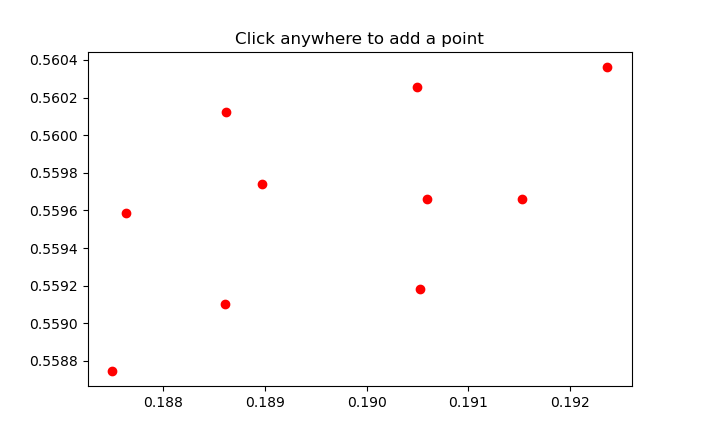

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title("Click anywhere to add a point")

def on_click(event):
    if event.inaxes is None:
        return
    x, y = event.xdata, event.ydata
    ax.plot(x, y, 'ro')
    fig.canvas.draw()

fig.canvas.mpl_connect('button_press_event', on_click)
plt.show()


### Python Tinker
There is a std python library called tinker via which you can make interactive windows! Let us make an example of a simple GUI window with a button.

In [1]:
import tkinter as tk

def say_hello():
    print("Hello World")

# Create main window
root = tk.Tk()
root.title("Simple Tkinter Example")
root.geometry("200x100")

# Create a button
button = tk.Button(root, text="Press Me", command=say_hello)
button.pack(pady=20)

# Start the GUI loop
root.mainloop()


Hello World
Hello World
Hello World
Hello World


Now let's add some input reading as well!

In [2]:
import tkinter as tk

def read_and_print():
    text = entry.get()
    print("You typed:", text)

# Create main window
root = tk.Tk()
root.title("Input Example")
root.geometry("250x120")

# Input field
entry = tk.Entry(root, width=25)
entry.pack(pady=10)

# Button
button = tk.Button(root, text="Print Input", command=read_and_print)
button.pack(pady=5)

root.mainloop()


You typed: hello world!


The window ofcourse can show an output as well!

In [4]:
import tkinter as tk

def greet():
    name = entry.get()
    greeting_label.config(text=f"Hello {name}!")

# Main window
root = tk.Tk()
root.title("Greeting App")
root.geometry("300x180")

# Header
header_label = tk.Label(root, text="Write your name:", font=("Arial", 12))
header_label.pack(pady=5)

# Entry box
entry = tk.Entry(root, width=25)
entry.pack(pady=5)

# Button
button = tk.Button(root, text="Greet Me", command=greet)
button.pack(pady=5)

# Greeting output
greeting_label = tk.Label(root, text="", font=("Arial", 12))
greeting_label.pack(pady=10)

root.mainloop()


### Executable Python Tinker Script

well, now we can make an .exe or linux binary file. Start by installing pyinstaller

```
pip install pyinstaller
```

Let us make the script we want to make and save it to file:

In [5]:
code = """import tkinter as tk

def greet():
    name = entry.get()
    greeting_label.config(text=f"Hello {name}!")

# Main window
root = tk.Tk()
root.title("Greeting App")
root.geometry("300x180")

# Header
header_label = tk.Label(root, text="Write your name:", font=("Arial", 12))
header_label.pack(pady=5)

# Entry box
entry = tk.Entry(root, width=25)
entry.pack(pady=5)

# Button
button = tk.Button(root, text="Greet Me", command=greet)
button.pack(pady=5)

# Greeting output
greeting_label = tk.Label(root, text="", font=("Arial", 12))
greeting_label.pack(pady=10)

root.mainloop()
"""

# Save to file
with open("greeting_app.py", "w") as f:
    f.write(code)

print("Saved as greeting_app.py")

Saved as greeting_app.py


after making the script we can now turn it into executable via:

```pyinstaller --onefile greeting_app.py```

In [7]:
import subprocess

subprocess.run(["pyinstaller", "--onefile", "greeting_app.py"])

395 INFO: PyInstaller: 6.17.0, contrib hooks: 2025.10
395 INFO: Python: 3.10.18 (conda)
396 INFO: Platform: Linux-6.8.0-87-generic-x86_64-with-glibc2.35
396 INFO: Python environment: /home/dyymon/anaconda3/envs/maturitni_informatika
396 INFO: wrote /home/dyymon/PycharmProjects/maturitni-informatika/lecture_09/greeting_app.spec
404 INFO: Module search paths (PYTHONPATH):
['/home/dyymon/anaconda3/envs/maturitni_informatika/bin',
 '/home/dyymon/PycharmProjects/maturitni-informatika',
 '/snap/pycharm-professional/558/plugins/python-ce/helpers/pydev',
 '/snap/pycharm-professional/558/plugins/python-ce/helpers/jupyter_debug',
 '/home/dyymon/anaconda3/envs/maturitni_informatika/lib/python310.zip',
 '/home/dyymon/anaconda3/envs/maturitni_informatika/lib/python3.10',
 '/home/dyymon/anaconda3/envs/maturitni_informatika/lib/python3.10/lib-dynload',
 '/home/dyymon/anaconda3/envs/maturitni_informatika/lib/python3.10/site-packages',
 '/home/dyymon/PycharmProjects/maturitni-informatika/lecture_09']
9

CompletedProcess(args=['pyinstaller', '--onefile', 'greeting_app.py'], returncode=0)

for __linux__ systems you can execute it via:

`./dist/greeting_app`

on __windows__ system via:

`dist/greeting_app.exe`

In [13]:
import platform

os_name = platform.system()

if os_name == "Linux":
    subprocess.run(["./dist/greeting_app"])
elif os_name == "Windows":
    subprocess.run(["dist/greeting_app.exe"])
else:
    print("but why?")

or well by clicking at it!